In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Data Preparation

In [3]:
#1. Regularize the column names
df.columns = df.columns.str.capitalize().str.replace(" ", "_")

In [4]:
df.head()

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Regularize the string columns
## First find which columns are strings
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine_fuel_type      object
Engine_hp            float64
Engine_cylinders     float64
Transmission_type     object
Driven_wheels         object
Number_of_doors      float64
Market_category       object
Vehicle_size          object
Vehicle_style         object
Highway_mpg            int64
City_mpg               int64
Popularity             int64
Msrp                   int64
dtype: object

In [6]:
## Get the columns that are objects
df.dtypes[df.dtypes == "object"]

Make                 object
Model                object
Engine_fuel_type     object
Transmission_type    object
Driven_wheels        object
Market_category      object
Vehicle_size         object
Vehicle_style        object
dtype: object

In [7]:
## Get access to the indices
df.dtypes[df.dtypes == "object"].index

Index(['Make', 'Model', 'Engine_fuel_type', 'Transmission_type',
       'Driven_wheels', 'Market_category', 'Vehicle_size', 'Vehicle_style'],
      dtype='object')

In [8]:
## COnvert to a python list
strings = list(df.dtypes[df.dtypes == "object"].index)
strings

['Make',
 'Model',
 'Engine_fuel_type',
 'Transmission_type',
 'Driven_wheels',
 'Market_category',
 'Vehicle_size',
 'Vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [10]:
df.head()

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique()[:5])
    print(df[i].nunique())
    print()

Make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

Model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

Year
[2011 2012 2013 1992 1993]
28

Engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

Engine_hp
[335. 300. 230. 320. 172.]
356

Engine_cylinders
[ 6.  4.  5.  8. 12.]
9

Transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

Driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

Number_of_doors
[ 2.  4.  3. nan]
3

Market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

Vehicle_size
['compact' 'midsize' 'large']
3

Vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

Highway_mpg
[26 28 27 25 24]
59

City_mpg
[19 20 18 17 16]
69

Popularity
[3916 3105  819  617 1013]
48

Msrp
[46135 40650 36350 29450 345

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='Msrp', ylabel='Count'>

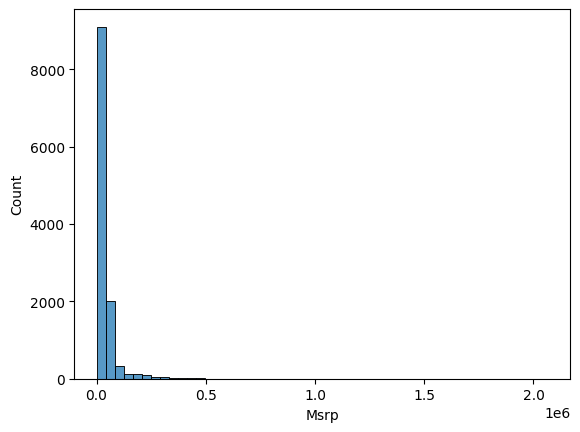

In [13]:
# Plot histogram of price
sns.histplot(df.Msrp, bins =50)

<Axes: xlabel='Msrp', ylabel='Count'>

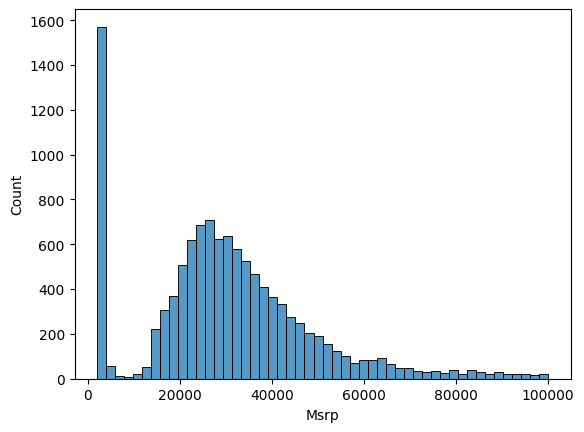

In [14]:
# Let us look at the distribution of prices less than 100k
sns.histplot(df.Msrp[df.Msrp < 100000], bins = 50)

Most of the prices are clustered around 1000. Entering this kind of data into our model will throw off the model because of the price variations. 
A way to resolve this is taking the logarithm of the values. This transforms the data into simpler units. If we have data with zeros, logarithm of zero will throw an error so we use log[x+1]. Numpy solves this for us with the function log1p.

In [15]:
price_logs = np.log1p(df.Msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: Msrp, Length: 11914, dtype: float64

<Axes: xlabel='Msrp', ylabel='Count'>

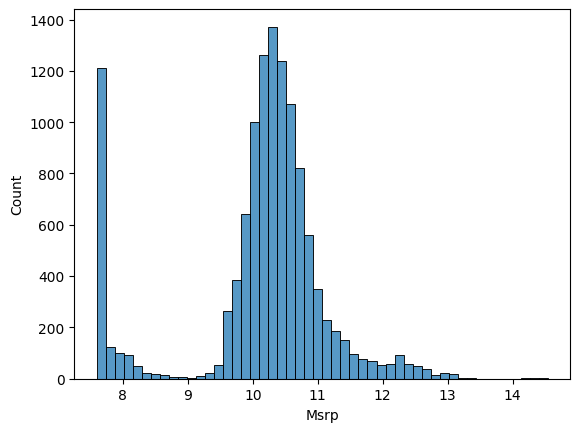

In [16]:
# Visualize
sns.histplot(price_logs, bins = 50)

In [17]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_fuel_type        3
Engine_hp              69
Engine_cylinders       30
Transmission_type       0
Driven_wheels           0
Number_of_doors         6
Market_category      3742
Vehicle_size            0
Vehicle_style           0
Highway_mpg             0
City_mpg                0
Popularity              0
Msrp                    0
dtype: int64

## Setting up validation framework

We will split the dataset into 60% training, 20% validation and 20% testing.

In [18]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n- n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [19]:
# Create a range of numbers from 0 to n
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [20]:
# Shuffle the numbers
np.random.seed(2)
rng = np.random.default_rng()
rng.shuffle(idx)

In [21]:
idx

array([  757,  5459,  1711, ..., 11430,  1478, 10534])

In [22]:
df_train = df.iloc[idx[: n_train ]]
df_val = df.iloc[idx[n_train: n_train+ n_val]]
df_test = df.iloc[idx[n_train+ n_val:]]

In [23]:
df_train

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
757,volvo,780,1990,regular_unleaded,188.0,4.0,automatic,rear_wheel_drive,2.0,luxury,midsize,coupe,20,16,870,2000
5459,volkswagen,golf,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,36,25,873,19595
1711,mazda,b-series_pickup,2000,regular_unleaded,119.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,24,20,586,2961
8060,dodge,ram_150,1992,regular_unleaded,180.0,6.0,manual,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,14,1851,2000
7860,infiniti,q70,2015,premium_unleaded_(required),420.0,8.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",large,sedan,23,16,190,65350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7870,infiniti,q70,2016,premium_unleaded_(required),330.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,26,18,190,51350
3919,lotus,elise,2011,premium_unleaded_(required),217.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,26,20,613,57950
3236,cadillac,cts_wagon,2013,regular_unleaded,270.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,26,18,1624,44050
3235,cadillac,cts_wagon,2013,regular_unleaded,318.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,wagon,26,18,1624,51650


In [24]:
df_val

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
8984,hyundai,santa_fe_sport,2017,regular_unleaded,265.0,4.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,27,20,1439,36500
9130,toyota,sequoia,2016,regular_unleaded,381.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,17,13,2031,54115
4668,ferrari,ff,2015,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",large,coupe,16,11,2774,295000
10081,plymouth,sundance,1993,regular_unleaded,93.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,23,535,2000
10783,chevrolet,trax,2017,regular_unleaded,138.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,30,24,1385,27600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,cadillac,cts,2016,premium_unleaded_(recommended),268.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,31,21,1624,51285
2005,porsche,boxster,2015,premium_unleaded_(required),330.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,26,19,1715,73500
5538,plymouth,grand_voyager,2000,regular_unleaded,158.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,23,16,535,2267
3687,mercedes-benz,e-class,2015,premium_unleaded_(required),329.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,29,20,617,62350


In [25]:
df_test

,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity,Msrp
3969,mitsubishi,endeavor,2010,premium_unleaded_(recommended),225.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,21,15,436,27999
4673,ford,fiesta,2015,regular_unleaded,120.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,36,28,5657,14455
7517,nissan,pathfinder,2015,regular_unleaded,260.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,4dr_suv,27,20,2009,41560
9287,gmc,sierra_1500_classic,2007,regular_unleaded,295.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,17,13,549,33495
9032,gmc,savana,2016,flex-fuel_(unleaded/e85),285.0,8.0,automatic,rear_wheel_drive,3.0,flex_fuel,midsize,passenger_van,16,11,549,36715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,honda,civic,2015,regular_unleaded,143.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,36,28,2202,20390
1416,nissan,altima,2016,regular_unleaded,182.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,39,27,2009,28570
11430,ford,windstar,2001,regular_unleaded,200.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,22,16,5657,31115
1478,chevrolet,astro_cargo,2004,regular_unleaded,190.0,6.0,automatic,all_wheel_drive,3.0,NaN,large,cargo_minivan,18,14,1385,25195


In [26]:
## We can reset the indices if we'd like
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [27]:
## Log transform y vector
y_train = np.log1p(df_train.Msrp.values)
y_test = np.log1p(df_test.Msrp.values)
y_val = np.log1p(df_val.Msrp.values)

In [28]:
# Remove price from X matrix
del df_train["Msrp"]
del df_test["Msrp"]
del df_val["Msrp"]

In [29]:
df_train


,Make,Model,Year,Engine_fuel_type,Engine_hp,Engine_cylinders,Transmission_type,Driven_wheels,Number_of_doors,Market_category,Vehicle_size,Vehicle_style,Highway_mpg,City_mpg,Popularity
0,volvo,780,1990,regular_unleaded,188.0,4.0,automatic,rear_wheel_drive,2.0,luxury,midsize,coupe,20,16,870
1,volkswagen,golf,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,36,25,873
2,mazda,b-series_pickup,2000,regular_unleaded,119.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,24,20,586
3,dodge,ram_150,1992,regular_unleaded,180.0,6.0,manual,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,14,1851
4,infiniti,q70,2015,premium_unleaded_(required),420.0,8.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",large,sedan,23,16,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,infiniti,q70,2016,premium_unleaded_(required),330.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,26,18,190
7146,lotus,elise,2011,premium_unleaded_(required),217.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,26,20,613
7147,cadillac,cts_wagon,2013,regular_unleaded,270.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,26,18,1624
7148,cadillac,cts_wagon,2013,regular_unleaded,318.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,wagon,26,18,1624


# Linear Regression Normal equation
we need to multiply the feature matrix X with weights vector w to get y (the prediction for price).

g(X) = Xw ~ y
XTX is called the GRAM MATRIX and for XTX the inverse exists, because this is squared (n+1)x(n+1)


(XTX)⁻1XTXw = (XTX)⁻1XTy

(XTX)⁻1XTX = Iw

Iw = (XTX)-1XTy

That value is the closest possible solution

w = (XTX)⁻1XTy

In [49]:
# First define X
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
X= np.array(X)

In [32]:
XtX = X.T.dot(X)
XtX

array([[ 696471,   44115,  717301],
       [  44115,    7146,  118770],
       [ 717301,  118770, 6359479]])

In [33]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv

array([[ 2.35807654e-06, -1.46995131e-05,  8.55581192e-09],
       [-1.46995131e-05,  2.94560654e-04, -3.84323834e-06],
       [ 8.55581192e-09, -3.84323834e-06,  2.28057098e-07]])

In [35]:
## Computing to see if we will get an identity matrix
XtX_inv.dot(XtX).round(1)

array([[ 1., -0., -0.],
       [ 0.,  1., -0.],
       [-0.,  0.,  1.]])

we need to add a new column with ones to the feature matrix X. That is for the multiplication with w0.

In [36]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
X= np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.300e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [38]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [41]:
XtX = X.T.dot(X)

In [42]:
XtX_inv= np.linalg.inv(XtX)

In [43]:
XtX.dot(XtX_inv).round(1)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0., -0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [46]:
w= XtX_inv.dot(X.T).dot(y)
w0, w_full = w[0], w[1:] 
w0, w_full 

(np.float64(30009.252922766627),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

We can write all of this into a function

In [71]:
def train_linear_reg(X, y):
    ones = np.ones(X.shape[0])
    X= np.column_stack([ones, X])
    XtX = X.T.dot(X)
    Xtx_inv = np.linalg.inv(XtX)
    w= Xtx_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [72]:
train_linear_reg(X, y)

(np.float64(30009.252922766627),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

We can implement this function on the numerical values of our car df.

In [73]:
base = ['Engine_hp', 'Engine_cylinders', 'Highway_mpg', 'City_mpg', 'Popularity']
 
df_train[base].head()

,Engine_hp,Engine_cylinders,Highway_mpg,City_mpg,Popularity
0,188.0,4.0,20,16,870
1,170.0,4.0,36,25,873
2,119.0,4.0,24,20,586
3,180.0,6.0,17,14,1851
4,420.0,8.0,23,16,190


In [74]:
# Value extraction
X_train = df_train[base].values
X_train

array([[ 188.,    4.,   20.,   16.,  870.],
       [ 170.,    4.,   36.,   25.,  873.],
       [ 119.,    4.,   24.,   20.,  586.],
       ...,
       [ 270.,    6.,   26.,   18., 1624.],
       [ 318.,    6.,   26.,   18., 1624.],
       [ 301.,    8.,   18.,   15.,  454.]])

In [75]:
# Checking for missing values
df_train[base].isnull().sum()

Engine_hp           0
Engine_cylinders    0
Highway_mpg         0
City_mpg            0
Popularity          0
dtype: int64

In [76]:
# Filling missing values with zero
df_train[base] = df_train[base].fillna(0)
df_train[base].isnull().sum()

Engine_hp           0
Engine_cylinders    0
Highway_mpg         0
City_mpg            0
Popularity          0
dtype: int64

In [77]:
X_train = df_train[base].values
X_train

array([[ 188.,    4.,   20.,   16.,  870.],
       [ 170.,    4.,   36.,   25.,  873.],
       [ 119.,    4.,   24.,   20.,  586.],
       ...,
       [ 270.,    6.,   26.,   18., 1624.],
       [ 318.,    6.,   26.,   18., 1624.],
       [ 301.,    8.,   18.,   15.,  454.]])

In [78]:
y_train

array([ 7.60140233,  9.88308074,  7.99361999, ..., 10.69310333,
       10.85226484, 10.84507559])

In [80]:
w0, w = train_linear_reg(X_train, y_train)
w0, w

(np.float64(7.434314648096618),
 array([ 9.37904703e-03, -1.18556461e-01,  4.94515420e-02, -1.40524334e-02,
        -1.14931914e-05]))

In [81]:
# y_pred = w0 + X.w
y_pred= w0 + X_train.dot(w)
y_pred

array([ 9.47754248,  9.97343792,  8.97524873, ..., 10.26944993,
       10.71964419,  9.98307946])

<Axes: ylabel='Count'>

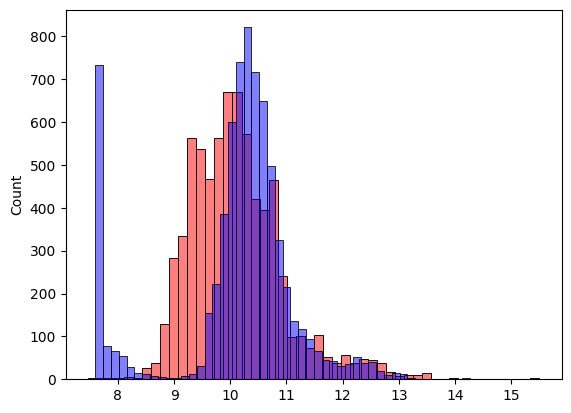

In [82]:
## Plotting model performance
sns.histplot(y_pred, color= "red", alpha = 0.5, bins= 50)
sns.histplot(y_train, color= "blue", alpha = 0.5, bins= 50)

## Model evaluation with Root Mean Squared Error (RMSE)
We have the following variables, so we can calculate the RMSE.

g(xi) – prediction for xi (observation i)
yi – actual value
m – number of different observations
–> g(xi) – yi is the difference between the prediction and the actual value
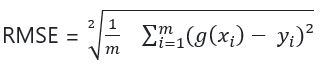![image.png](attachment:989f22d7-b13b-47a3-8c1a-af4e19f48

In [83]:
def rmse(y_pred, y):
    error = y_pred - y
    squared_error = error **2
    mean_se = squared_error.mean()
    return np.sqrt(mean_se)
    

In [84]:
rmse(y_pred, y_train)

np.float64(0.7479892209192148)

In [85]:
## Validating the model.
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [86]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)
 
# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
# Evaluation part:
rmse(y_val, y_pred)

np.float64(0.8158271091245964)

## Simple feature engineering
This is the process of creating new features to train our model. Suppose we want to develop a new feature based on the existing ones in the feature matrix X. Let’s assume we want to use the year information as an age information. Let’s assume further we have year 2017.

In [88]:
df.Year.max()

np.int64(2017)

In [89]:
base = ['Engine_hp', 'Engine_cylinders', 'Highway_mpg', 'City_mpg', 'Popularity']
 
def prepare_X(df):
    df = df.copy()
     
    df['age'] = 2017 - df.Year
    features = base + ['age']
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
X_train = prepare_X(df_train)
X_train

array([[1.880e+02, 4.000e+00, 2.000e+01, 1.600e+01, 8.700e+02, 2.700e+01],
       [1.700e+02, 4.000e+00, 3.600e+01, 2.500e+01, 8.730e+02, 1.000e+00],
       [1.190e+02, 4.000e+00, 2.400e+01, 2.000e+01, 5.860e+02, 1.700e+01],
       ...,
       [2.700e+02, 6.000e+00, 2.600e+01, 1.800e+01, 1.624e+03, 4.000e+00],
       [3.180e+02, 6.000e+00, 2.600e+01, 1.800e+01, 1.624e+03, 4.000e+00],
       [3.010e+02, 8.000e+00, 1.800e+01, 1.500e+01, 4.540e+02, 0.000e+00]])

In [91]:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.5274024743649186)

<Axes: ylabel='Count'>

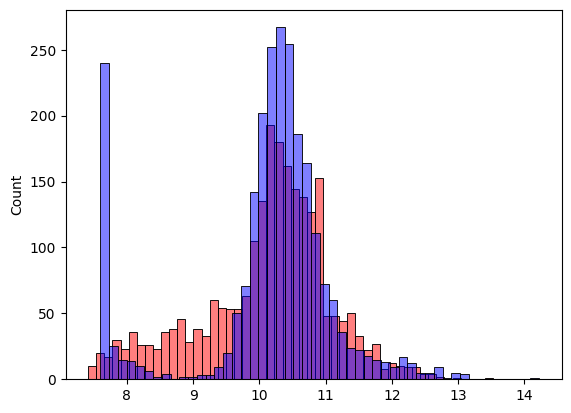

In [92]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)